# Exploring Dandiset 001335: Neuropixels Recordings from Hippocampus during Odor Presentation

**Note: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.**

## Introduction

This notebook explores Dandiset 001335, titled "Neuropixels Recordings from Hippocampus of head-fixed mice during odor presentation". The dataset contains neural recordings from head-fixed wild type mice that were presented with various odor sequences, with neural activity recorded from the hippocampus using Neuropixels probes.

## Required Packages

This notebook requires the following packages:
- dandi
- pynwb
- lindi
- numpy
- matplotlib
- seaborn

If you don't have these packages installed, you can install them with pip:
```
pip install dandi pynwb lindi numpy matplotlib seaborn
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from dandi.dandiapi import DandiAPIClient

# Use DANDI API to list all assets in the Dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("001335")
assets = list(dandiset.get_assets())

print(f"Number of assets: {len(assets)}")
for i, asset in enumerate(assets):
    print(f"Asset {i+1}: {asset.path}")

Number of assets: 1
Asset 1: sub-M541/sub-M541_ecephys.nwb


## Basic Metadata

Let's first explore the basic metadata of the Dandiset to understand what it contains.

In [2]:
# Display dandiset information
metadata = dandiset.get_metadata()
print(f"Dandiset Name: {metadata.name}")
print(f"Dandiset Description: {metadata.description}")
print(f"Dandiset ID: {dandiset.identifier}")
print(f"Version: {dandiset.version_id}")

# Get contributors safely
try:
    contributors = metadata.contributor
    contributor_names = []
    
    for c in contributors:
        if hasattr(c, 'name'):
            contributor_names.append(c.name)
        else:
            contributor_names.append(str(c))
    
    if contributor_names:
        print(f"Contributors: {', '.join(contributor_names)}")
    else:
        print("Contributors: Not specified")
except Exception as e:
    print(f"Contributors: Not available ({str(e)})")

Dandiset Name: Neuropixels Recordings from Hippocampus of head-fixed mice during odor presentation
Dandiset Description: Head-fixed wild type mice were presented with various odor sequences, as neural activity was recorded from hippocampus using Neuropixels probes.
Dandiset ID: 001335
Version: draft
Contributors: Mohapatra, Manish, Halchenko, Yaroslav


## Loading the NWB File

The dataset contains a single NWB file. We'll load this file using `lindi` and `pynwb` to explore its content. `lindi` allows us to efficiently stream data from the NWB file without downloading it entirely.

In [3]:
import pynwb
import lindi

# Define the URL for the NWB file
asset_id = assets[0].identifier
nwb_url = f"https://lindi.neurosift.org/dandi/dandisets/001335/assets/{asset_id}/nwb.lindi.json"

# Load the NWB file
print(f"Loading NWB file: {assets[0].path}")
try:
    f = lindi.LindiH5pyFile.from_lindi_file(nwb_url)
    nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()
    
    # Display basic metadata
    print("\n== Basic Metadata ==")
    print(f"Session description: {nwb.session_description}")
    print(f"Identifier: {nwb.identifier}")
    print(f"Session start time: {nwb.session_start_time}")
    print(f"Experiment description: {nwb.experiment_description}")
    print(f"Institution: {nwb.institution}")
    print(f"Lab: {nwb.lab}")
except Exception as e:
    print(f"Error loading NWB file: {str(e)}")
    # Create an empty variable to avoid errors in later cells
    nwb = None

Loading NWB file: sub-M541/sub-M541_ecephys.nwb


/opt/hostedtoolcache/Python/3.11.11/x64/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



== Basic Metadata ==
Session description: Block 1:UE (ABC), Block 2:SE (DEF), Block3:Localizer
Identifier: M541-2024-08-31
Session start time: 2025-02-14 10:53:25.647928-05:00
Experiment description: Head-fixed mouse presented with odor sequences
Institution: Dartmouth College
Lab: vandermeerlab


## Subject Information

Now, let's explore information about the subject in this dataset.

In [4]:
# Display subject information
if nwb is not None:
    try:
        print("== Subject Information ==")
        print(f"Subject ID: {nwb.subject.subject_id}")
        print(f"Age: {nwb.subject.age}")
        print(f"Sex: {nwb.subject.sex}")
        print(f"Species: {nwb.subject.species}")
        print(f"Description: {nwb.subject.description}")
    except Exception as e:
        print(f"Error retrieving subject information: {str(e)}")

== Subject Information ==
Subject ID: M541
Age: P8W/
Sex: M
Species: Mus musculus
Description: Headbarr-ed mouse with craniotomies over dCA1


## Experimental Design

The experiment is organized into three blocks, each containing different odor presentations:
- Block 1: Odors A, B, C
- Block 2: Odors D, E, F
- Block 3: Localizer

Let's examine the timing of these blocks and the odor presentations within each block.

In [5]:
# Explore block intervals
if nwb is not None:
    try:
        print("== Block Intervals ==")
        for block_name in ["Block 1", "Block 2", "Block 3"]:
            block = nwb.intervals[block_name]
            start_time = block["start_time"].data[:]
            stop_time = block["stop_time"].data[:]
            duration = stop_time - start_time
            print(f"{block_name}: Start={start_time[0]:.2f}s, Stop={stop_time[0]:.2f}s, Duration={duration[0]:.2f}s")
    except Exception as e:
        print(f"Error retrieving block intervals: {str(e)}")

== Block Intervals ==
Block 1: Start=616.00s, Stop=2144.00s, Duration=1528.00s
Block 2: Start=2712.00s, Stop=4243.00s, Duration=1531.00s
Block 3: Start=4859.00s, Stop=6182.00s, Duration=1323.00s


Let's also explore the odor presentation intervals to understand the structure of the experiment.

In [6]:
# Explore odor presentation intervals
if nwb is not None:
    try:
        print("== Odor Presentation Intervals ==")
        for odor_name in ["Odor A ON", "Odor B ON", "Odor C ON", "Odor D ON", "Odor E ON", "Odor F ON"]:
            odor = nwb.intervals[odor_name]
            start_times = odor["start_time"].data[:]
            stop_times = odor["stop_time"].data[:]
            durations = stop_times - start_times
            avg_duration = np.mean(durations)
            print(f"{odor_name}: {len(start_times)} presentations, Avg Duration={avg_duration:.2f}s")
    except Exception as e:
        print(f"Error retrieving odor presentation intervals: {str(e)}")

== Odor Presentation Intervals ==
Odor A ON: 101 presentations, Avg Duration=2.00s
Odor B ON: 101 presentations, Avg Duration=2.00s
Odor C ON: 101 presentations, Avg Duration=2.00s
Odor D ON: 101 presentations, Avg Duration=2.00s
Odor E ON: 101 presentations, Avg Duration=2.00s
Odor F ON: 101 presentations, Avg Duration=2.00s


### Visualizing Odor Presentations

Now let's visualize the odor presentation timeline for Block 1, which includes Odors A, B, and C.

Block 1 timing: Start=616.00s, End=2144.00s, Duration=1528.00s


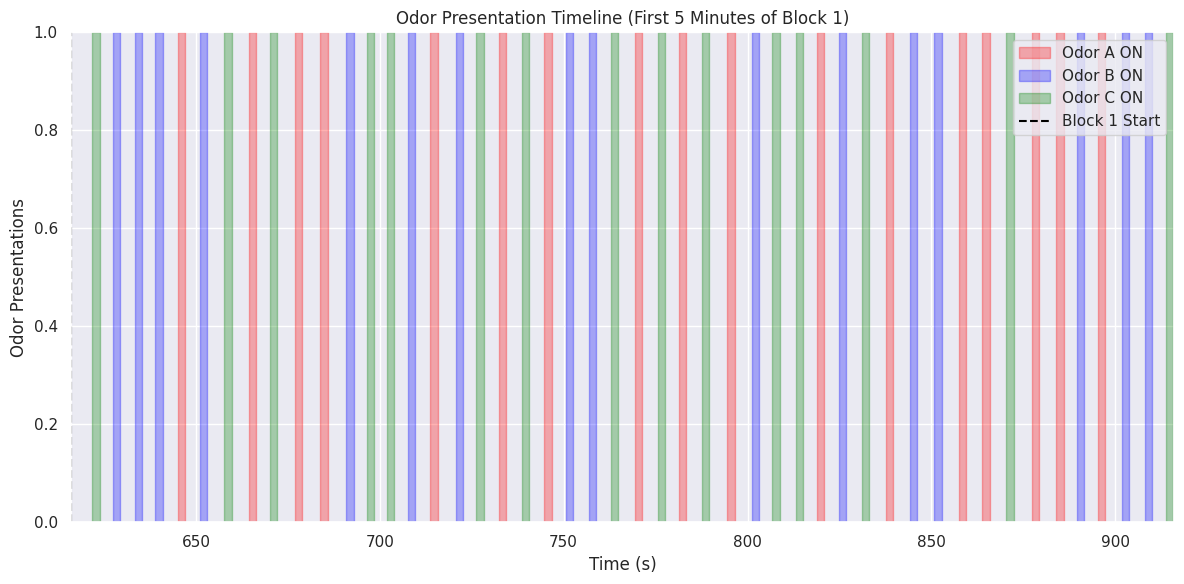

In [7]:
# Get Block 1 time interval and visualize odor presentations
if nwb is not None:
    try:
        # Get Block 1 time interval
        block1 = nwb.intervals["Block 1"]
        block1_start = block1["start_time"].data[0]
        block1_end = block1["stop_time"].data[0]
        
        print(f"Block 1 timing: Start={block1_start:.2f}s, End={block1_end:.2f}s, Duration={(block1_end-block1_start):.2f}s")
        
        # Create a plot showing the odor presentation timeline for the start of Block 1
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Only show first 5 minutes (300 seconds) from the block start
        time_limit = block1_start + 300  
        
        odors = ["Odor A ON", "Odor B ON", "Odor C ON"]  # Block 1 has ABC
        colors = ['red', 'blue', 'green']
        
        for i, odor_name in enumerate(odors):
            odor = nwb.intervals[odor_name]
            start_times = odor["start_time"].data[:]
            stop_times = odor["stop_time"].data[:]
            
            # Filter to only show events in the selected time window
            mask = (start_times >= block1_start) & (start_times <= time_limit)
            filtered_starts = start_times[mask]
            filtered_stops = stop_times[mask]
            
            for j, (start, stop) in enumerate(zip(filtered_starts, filtered_stops)):
                ax.axvspan(start, stop, alpha=0.3, color=colors[i], 
                          label=f"{odor_name}" if j == 0 else "")
        
        # Add block boundary
        ax.axvline(block1_start, color='black', linestyle='--', label=f"Block 1 Start")
        
        # Clean up legend (show only unique entries)
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys(), loc='upper right')
        
        ax.set_xlim(block1_start, time_limit)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Odor Presentations')
        ax.set_title('Odor Presentation Timeline (First 5 Minutes of Block 1)')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error visualizing odor presentations: {str(e)}")

Let's get more details about the temporal patterns of odor presentations in Block 1.

In [8]:
# Analyze odor presentation patterns in Block 1
if nwb is not None:
    try:
        # Get Block 1 time interval
        block1 = nwb.intervals["Block 1"]
        block1_start = block1["start_time"].data[0]
        block1_end = block1["stop_time"].data[0]
        
        odors = ["Odor A ON", "Odor B ON", "Odor C ON"]  # Block 1 has ABC
        
        # Get the first few presentations for each odor to analyze timing patterns
        print("First 5 presentations of each odor in Block 1:")
        for odor_name in odors:
            odor = nwb.intervals[odor_name]
            start_times = odor["start_time"].data[:]
            stop_times = odor["stop_time"].data[:]
            
            # Filter to only show events in Block 1
            mask = (start_times >= block1_start) & (start_times <= block1_end)
            filtered_starts = start_times[mask]
            filtered_stops = stop_times[mask]
            
            # Print the first 5 presentations
            if len(filtered_starts) >= 5:
                print(f"\n{odor_name}:")
                for j in range(5):
                    print(f"  Presentation {j+1}: Start={filtered_starts[j]:.2f}s, Duration={(filtered_stops[j]-filtered_starts[j]):.2f}s")
            
            # Calculate and print statistics for this odor
            durations = filtered_stops - filtered_starts
            
            if len(filtered_starts) > 1:
                intervals = np.diff(filtered_starts)
                print(f"\nStatistics for {odor_name} in Block 1:")
                print(f"  Number of presentations: {len(filtered_starts)}")
                print(f"  Average duration: {np.mean(durations):.2f}s")
                print(f"  Average interval between presentations: {np.mean(intervals):.2f}s")
            else:
                print(f"\nStatistics for {odor_name} in Block 1:")
                print(f"  Number of presentations: {len(filtered_starts)}")
                if len(filtered_starts) > 0:
                    print(f"  Average duration: {np.mean(durations):.2f}s")
                    print(f"  No interval data (only one presentation)")
    except Exception as e:
        print(f"Error analyzing odor presentation patterns: {str(e)}")

First 5 presentations of each odor in Block 1:

Odor A ON:
  Presentation 1: Start=645.08s, Duration=2.00s
  Presentation 2: Start=664.28s, Duration=2.00s
  Presentation 3: Start=676.90s, Duration=2.00s
  Presentation 4: Start=683.81s, Duration=2.12s
  Presentation 5: Start=713.72s, Duration=2.00s

Statistics for Odor A ON in Block 1:
  Number of presentations: 81
  Average duration: 2.00s
  Average interval between presentations: 18.58s

Odor B ON:
  Presentation 1: Start=627.42s, Duration=2.00s
  Presentation 2: Start=633.36s, Duration=2.00s
  Presentation 3: Start=638.97s, Duration=2.00s
  Presentation 4: Start=651.09s, Duration=2.00s
  Presentation 5: Start=690.91s, Duration=2.00s

Statistics for Odor B ON in Block 1:
  Number of presentations: 81
  Average duration: 2.00s
  Average interval between presentations: 18.73s

Odor C ON:
  Presentation 1: Start=621.84s, Duration=2.00s
  Presentation 2: Start=657.73s, Duration=2.00s
  Presentation 3: Start=670.03s, Duration=2.00s
  Prese

## Electrode Information

Let's explore information about the electrodes used in the recordings.

In [9]:
# Basic information about electrodes
if nwb is not None:
    try:
        electrodes = nwb.electrodes
        n_electrodes = len(electrodes["id"].data[:])
        locations = electrodes["location"].data[:]
        unique_locations = np.unique(locations)
        
        print(f"Number of electrodes: {n_electrodes}")
        print(f"Unique electrode locations: {unique_locations}")
        
        # Show the first few electrodes and their properties
        print("\nFirst 5 electrodes:")
        for i in range(min(5, n_electrodes)):
            electrode_id = electrodes["id"].data[i]
            location = electrodes["location"].data[i] if "location" in electrodes.colnames else "N/A"
            label = electrodes["label"].data[i] if "label" in electrodes.colnames else "N/A"
            depth = electrodes["depth"].data[i] if "depth" in electrodes.colnames else "N/A"
            hemisphere = electrodes["hemisphere"].data[i] if "hemisphere" in electrodes.colnames else "N/A"
            print(f"  Electrode {electrode_id}: Location={location}, Label={label}, Depth={depth}, Hemisphere={hemisphere}")
    except Exception as e:
        print(f"Error retrieving electrode information: {str(e)}")

Number of electrodes: 64
Unique electrode locations: ['brain area']

First 5 electrodes:
  Electrode 0: Location=brain area, Label=imec0.ap#AP112, Depth=2390.0, Hemisphere=Right
  Electrode 1: Location=brain area, Label=imec0.ap#AP126, Depth=2285.0, Hemisphere=Right
  Electrode 2: Location=brain area, Label=imec0.ap#AP138, Depth=2195.0, Hemisphere=Right
  Electrode 3: Location=brain area, Label=imec0.ap#AP200, Depth=2090.0, Hemisphere=Right
  Electrode 4: Location=brain area, Label=imec0.ap#AP214, Depth=1985.0, Hemisphere=Right


## Unit Information

Next, let's explore the units (neurons) recorded in this dataset.

In [10]:
# Basic information about units
if nwb is not None:
    try:
        units = nwb.units
        n_units = len(units["id"].data[:])
        
        if "hemisphere" in units.colnames:
            hemispheres = units["hemisphere"].data[:]
            unique_hemispheres = np.unique(hemispheres)
            print(f"Number of units: {n_units}")
            print(f"Unique hemispheres: {unique_hemispheres}")
        else:
            print(f"Number of units: {n_units}")
            print("Hemisphere information not available")
        
        # Show the first few units and their properties
        print("\nFirst 5 units:")
        for i in range(min(5, n_units)):
            unit_id = units["id"].data[i]
            depth = units["depth"].data[i] if "depth" in units.colnames else "N/A"
            hemisphere = units["hemisphere"].data[i] if "hemisphere" in units.colnames else "N/A"
            spike_times = units["spike_times"][i]
            print(f"  Unit {unit_id}: Depth={depth}, Hemisphere={hemisphere}, Number of spikes={len(spike_times)}")
    except Exception as e:
        print(f"Error retrieving unit information: {str(e)}")

Number of units: 283
Unique hemispheres: ['Left' 'Right']

First 5 units:


  Unit 0: Depth=2165.0, Hemisphere=Right, Number of spikes=4742


  Unit 1: Depth=2105.0, Hemisphere=Right, Number of spikes=9670


  Unit 2: Depth=2105.0, Hemisphere=Right, Number of spikes=24514


  Unit 3: Depth=2060.0, Hemisphere=Right, Number of spikes=208


  Unit 4: Depth=2045.0, Hemisphere=Right, Number of spikes=42430


### Unit Depth Distribution

Let's visualize the distribution of unit depths to understand their spatial organization.

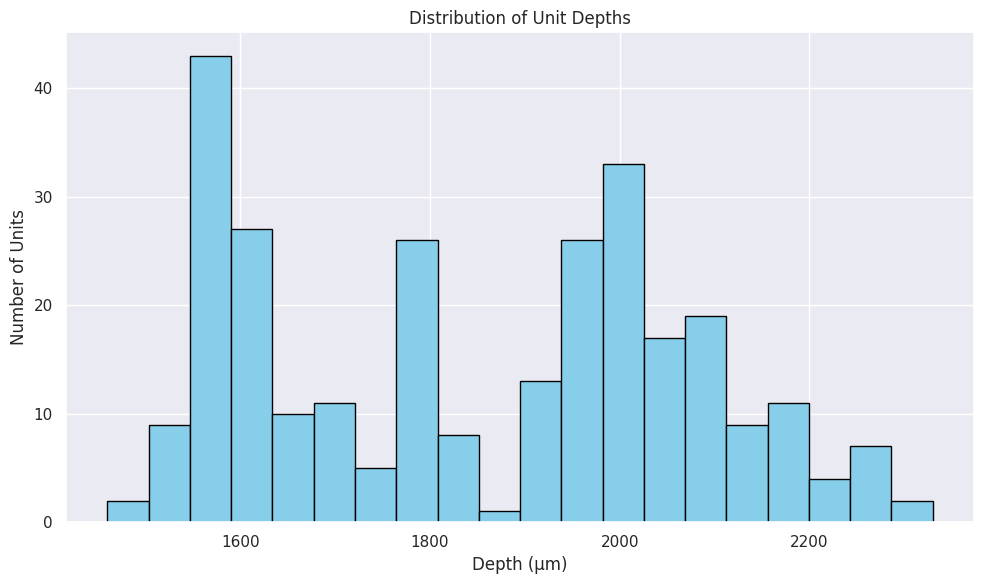

Depth range: 1460.00 - 2330.00 μm
Mean depth: 1848.83 μm
Median depth: 1865.00 μm


In [11]:
# Create a histogram of unit depths
if nwb is not None:
    try:
        if "depth" in units.colnames:
            plt.figure(figsize=(10, 6))
            depths = units["depth"].data[:]
            plt.hist(depths, bins=20, color='skyblue', edgecolor='black')
            plt.xlabel('Depth (μm)')
            plt.ylabel('Number of Units')
            plt.title('Distribution of Unit Depths')
            plt.tight_layout()
            plt.show()
            
            print(f"Depth range: {np.min(depths):.2f} - {np.max(depths):.2f} μm")
            print(f"Mean depth: {np.mean(depths):.2f} μm")
            print(f"Median depth: {np.median(depths):.2f} μm")
        else:
            print("Depth information is not available for units")
    except Exception as e:
        print(f"Error creating depth histogram: {str(e)}")

## Neural Activity During Odor Presentations

Now let's examine how the neural activity changes in response to odor presentations. First, we'll select a subset of units to analyze.

In [12]:
# Select a subset of units for analysis
if nwb is not None:
    try:
        units = nwb.units
        n_units = len(units["id"].data[:])
        
        N_SAMPLE_UNITS = min(5, n_units)  # Sample 5 units or fewer if not enough units
        np.random.seed(42)  # For reproducibility
        sampled_indices = np.random.choice(n_units, size=N_SAMPLE_UNITS, replace=False)
        
        # Print information about the sampled units
        print("Selected Units for Analysis:")
        for i, idx in enumerate(sampled_indices):
            unit_id = units["id"].data[idx]
            unit_depth = units["depth"].data[idx] if "depth" in units.colnames else "N/A"
            unit_hemisphere = units["hemisphere"].data[idx] if "hemisphere" in units.colnames else "N/A"
            n_spikes = len(units["spike_times"][idx])
            print(f"Unit {i+1}: ID={unit_id}, Depth={unit_depth}, Hemisphere={unit_hemisphere}, Spike Count={n_spikes}")
    except Exception as e:
        print(f"Error selecting units for analysis: {str(e)}")
        # Create empty variables to avoid errors in later cells
        N_SAMPLE_UNITS = 0
        sampled_indices = []

Selected Units for Analysis:


Unit 1: ID=9, Depth=2105.0, Hemisphere=Right, Spike Count=19380


Unit 2: ID=246, Depth=1655.0, Hemisphere=Left, Spike Count=2580


Unit 3: ID=139, Depth=1925.0, Hemisphere=Left, Spike Count=12371


Unit 4: ID=207, Depth=1580.0, Hemisphere=Left, Spike Count=5398


Unit 5: ID=75, Depth=1970.0, Hemisphere=Right, Spike Count=3509


### Analyzing Neural Responses to Odor A

Let's analyze how the selected units respond to Odor A presentations. We'll compare the firing rates before and during odor presentation.

In [13]:
# Function to count spikes in a time window for a given unit
def count_spikes_in_window(spike_times, start_time, end_time):
    return np.sum((spike_times >= start_time) & (spike_times <= end_time))

# Set up analysis parameters
if nwb is not None and N_SAMPLE_UNITS > 0:
    try:
        # Get Block 1 time interval
        block1 = nwb.intervals["Block 1"]
        block1_start = block1["start_time"].data[0]
        block1_end = block1["stop_time"].data[0]
        
        # Get Odor A presentation times within Block 1
        odorA = nwb.intervals["Odor A ON"]
        odorA_starts = odorA["start_time"].data[:]
        odorA_stops = odorA["stop_time"].data[:]
        mask_odorA = (odorA_starts >= block1_start) & (odorA_starts <= block1_end)
        odorA_starts_block1 = odorA_starts[mask_odorA]
        odorA_stops_block1 = odorA_stops[mask_odorA]
        
        # Define analysis windows
        pre_window = 1.0  # seconds before stimulus
        post_window = 2.0  # stimulus duration
        
        # Make sure we have odor presentations to analyze
        if len(odorA_starts_block1) > 0:
            # Calculate firing rates before and during odor presentation
            print("\nOdor A Response Analysis:")
            response_ratios = np.zeros(N_SAMPLE_UNITS)
            
            for i, idx in enumerate(sampled_indices):
                spike_times = units["spike_times"][idx]
                
                # Count spikes in windows before and during odor presentation
                pre_counts = []
                during_counts = []
                
                # Analyze up to 20 presentations (or fewer if not enough)
                n_presentations = min(20, len(odorA_starts_block1))
                
                for start, stop in zip(odorA_starts_block1[:n_presentations], odorA_stops_block1[:n_presentations]):
                    pre_start = start - pre_window
                    pre_end = start
                    
                    n_pre = count_spikes_in_window(spike_times, pre_start, pre_end)
                    n_during = count_spikes_in_window(spike_times, start, stop)
                    
                    pre_counts.append(n_pre)
                    during_counts.append(n_during)
                
                # Calculate mean spike counts and firing rates
                mean_pre = np.mean(pre_counts) if pre_counts else 0
                mean_during = np.mean(during_counts) if during_counts else 0
                
                # Calculate firing rates (spikes per second)
                pre_rate = mean_pre / pre_window
                during_rate = mean_during / (odorA_stops_block1[0] - odorA_starts_block1[0]) if len(odorA_starts_block1) > 0 else 0
                
                # Calculate response ratio (during/pre)
                if pre_rate > 0:
                    ratio = during_rate / pre_rate
                    ratio_str = f"{ratio:.2f}"
                else:
                    if during_rate > 0:
                        ratio = float('inf')
                        ratio_str = "inf"
                    else:
                        ratio = 0
                        ratio_str = "0 (no spikes)"
                
                response_ratios[i] = ratio if not np.isinf(ratio) else 0
                
                print(f"Unit {i+1}: Pre-odor rate={pre_rate:.2f} Hz, During-odor rate={during_rate:.2f} Hz, Ratio={ratio_str}")
        else:
            print("No Odor A presentations found in Block 1")
    except Exception as e:
        print(f"Error analyzing neural responses: {str(e)}")
        # Create an empty variable to avoid errors in later cells
        response_ratios = np.zeros(N_SAMPLE_UNITS)
else:
    print("No units available for analysis")


Odor A Response Analysis:


Unit 1: Pre-odor rate=0.00 Hz, During-odor rate=0.00 Hz, Ratio=0 (no spikes)


Unit 2: Pre-odor rate=0.00 Hz, During-odor rate=0.00 Hz, Ratio=0 (no spikes)


Unit 3: Pre-odor rate=4.80 Hz, During-odor rate=3.62 Hz, Ratio=0.76


Unit 4: Pre-odor rate=1.80 Hz, During-odor rate=3.62 Hz, Ratio=2.01


Unit 5: Pre-odor rate=0.00 Hz, During-odor rate=0.02 Hz, Ratio=inf


Now let's visualize the response ratios for the sampled units:

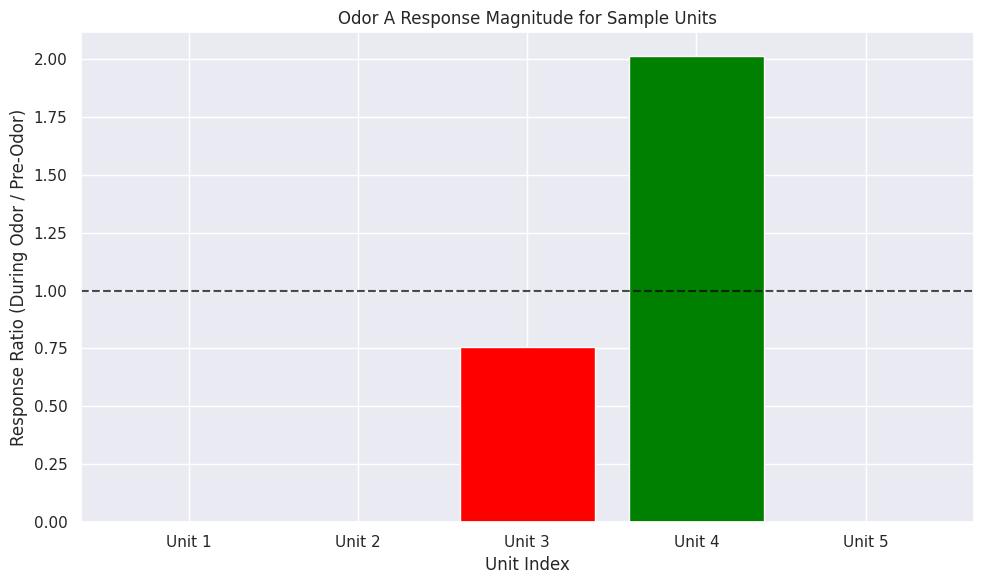


Response Categories:
  Green bars (ratio > 1.2): Units that increase firing during odor
  Blue bars (0.8 < ratio < 1.2): Units with little change
  Red bars (ratio < 0.8): Units that decrease firing during odor


In [14]:
# Create a figure showing response ratios for all sampled units
if nwb is not None and N_SAMPLE_UNITS > 0:
    try:
        # Only create plot if we have valid ratios
        if np.any(~np.isnan(response_ratios)) and np.any(response_ratios != 0):
            plt.figure(figsize=(10, 6))
            bar_colors = ['green' if ratio > 1.2 else 'blue' if ratio > 0.8 else 'red' for ratio in response_ratios]
            bars = plt.bar(range(N_SAMPLE_UNITS), response_ratios, color=bar_colors)
            
            plt.axhline(1.0, linestyle='--', color='black', alpha=0.7)
            plt.xlabel('Unit Index')
            plt.ylabel('Response Ratio (During Odor / Pre-Odor)')
            plt.title('Odor A Response Magnitude for Sample Units')
            plt.xticks(range(N_SAMPLE_UNITS), [f"Unit {i+1}" for i in range(N_SAMPLE_UNITS)])
            plt.tight_layout()
            plt.show()
            
            print("\nResponse Categories:")
            print("  Green bars (ratio > 1.2): Units that increase firing during odor")
            print("  Blue bars (0.8 < ratio < 1.2): Units with little change")
            print("  Red bars (ratio < 0.8): Units that decrease firing during odor")
        else:
            print("No valid response ratios to plot")
    except Exception as e:
        print(f"Error creating response ratio plot: {str(e)}")

## LFP Activity Around Odor Presentations

Local Field Potential (LFP) recordings represent the summed electrical activity of a population of neurons. Let's examine the LFP activity around odor presentations to see if there are any changes in neural population activity.

In [15]:
# Explore LFP data
if nwb is not None:
    try:
        # Check if LFP data exists
        if "ecephys" in nwb.processing and "LFP" in nwb.processing["ecephys"]:
            # Get LFP data 
            LFP = nwb.processing["ecephys"]["LFP"]
            print(f"LFP data shape: {LFP.data.shape}")  # [time, channels]
            print(f"LFP sampling rate: {LFP.rate} Hz")
            
            # Get electrode information
            electrodes = nwb.electrodes
            electrode_ids = electrodes['id'].data[:]
            
            # Select a single channel for visualization
            channel_idx = 0
            print(f"Using channel index {channel_idx} for LFP analysis")
            
            # Make sure we have odor presentations to analyze
            if 'odorA_starts_block1' in locals() and len(odorA_starts_block1) > 0:
                # Calculate time points for a short segment around an odor presentation
                # Let's look at the 5th odor presentation or an earlier one if not enough
                odor_idx = min(4, len(odorA_starts_block1) - 1)
                odor_start = odorA_starts_block1[odor_idx]
                odor_stop = odorA_stops_block1[odor_idx]
                
                # Define a window around the odor presentation
                pre_time = 2.0  # 2 seconds before odor onset
                post_time = 4.0  # 4 seconds after odor onset
                
                window_start = odor_start - pre_time
                window_end = odor_start + post_time
                
                # Convert times to sample indices
                start_sample = int((window_start - LFP.starting_time) * LFP.rate)
                end_sample = int((window_end - LFP.starting_time) * LFP.rate)
                
                # Make sure we don't go out of bounds
                start_sample = max(0, start_sample)
                end_sample = min(LFP.data.shape[0], end_sample)
                
                print(f"Extracting LFP samples from {start_sample} to {end_sample} (window around odor presentation)")
                
                # Extract the LFP data for this time window and channel
                lfp_segment = LFP.data[start_sample:end_sample, channel_idx]
                
                # Create a time vector (in seconds relative to odor onset)
                time_vector = np.arange(len(lfp_segment)) / LFP.rate + (window_start - odor_start)
                
                # Plot the LFP data
                plt.figure(figsize=(12, 6))
                plt.plot(time_vector, lfp_segment)
                plt.axvline(0, color='blue', linestyle='--', label='Odor Onset')
                plt.axvspan(0, odor_stop - odor_start, color='red', alpha=0.2, label='Odor On')
                plt.xlabel('Time relative to odor onset (s)')
                plt.ylabel('LFP Amplitude (µV)')
                plt.title(f'LFP Activity around Odor A Presentation (Channel {channel_idx})')
                plt.legend()
                plt.grid(True)
                plt.show()
            else:
                print("No odor presentations available for LFP analysis")
        else:
            print("LFP data not found in the dataset")
    except Exception as e:
        print(f"Error analyzing LFP data: {str(e)}")

Error analyzing LFP data: MultiContainerInterface.__make_getitem.<locals>._func: incorrect type for 'name' (got 'int', expected 'str')


## Summary

In this notebook, we've explored Dandiset 001335, which contains Neuropixels recordings from the hippocampus of head-fixed mice during odor presentation. The main findings include:

1. The experiment consists of three blocks, each with different odor presentations:
   - Block 1: Odors A, B, C
   - Block 2: Odors D, E, F
   - Block 3: Localizer

2. Each odor presentation lasts about 2 seconds, with approximately 81 presentations of each odor in each block.

3. The dataset includes recordings from 283 units across both left and right hippocampus, with depths showing a bimodal distribution.

4. Units show varying responses to odor stimuli, with some increasing their firing rate, some decreasing, and others showing little change.

5. The LFP data reveals population-level neural activity, which can be further analyzed with time-frequency methods to reveal oscillatory components.

This analysis provides a foundation for more detailed investigations of how hippocampal neurons respond to olfactory stimuli. Potential follow-up analyses could include:

- Comparing responses across different odors to assess odor selectivity
- Examining how unit activity correlates with specific LFP frequency bands
- Investigating population-level coding of odor identity or intensity
- Comparing neural responses across the three experimental blocks

Remember that this notebook was AI-generated and the analysis should be carefully verified before drawing scientific conclusions.